# Chapter 6 - Other Popular Machine Learning Methods
## Segment 5 - Naive Bayes Classifiers

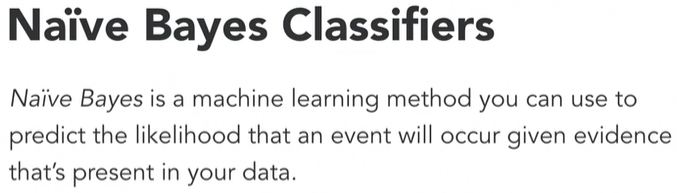

e're going to build a Naïve Bayes classifier from our large dataset of emails called spam base. Some of the records in the dataset are marked as spam. All of the other records are marked as not spam. Predictive features in the dataset serve as our evidence. Using them we can build a spam filtering system with Naïve Bayes model and successfully predict which incoming emails are spam and which are not. 

Naïve Bayes is a machine learning method you can use to predict the likelihood that an even will occur, given evidence that's present in your data. In the world of statistics, this is called Conditional Probability.

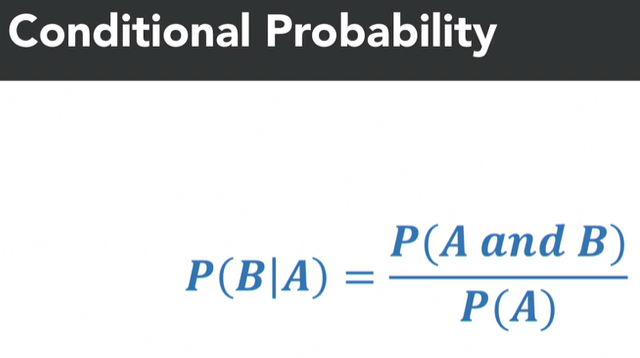

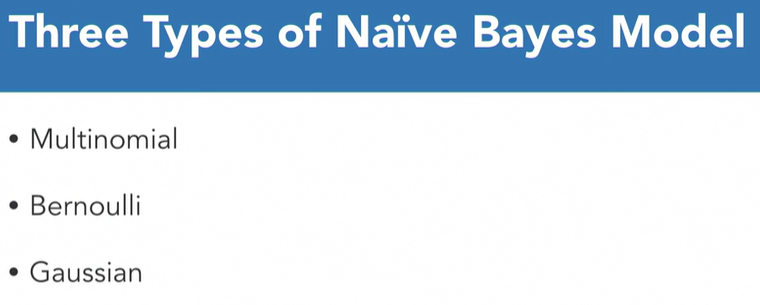

There are three types of Naïve Bayes models. Those are: Multinomial, Bernoulli and Gaussian. 

The Multinomial Naïve Bayes is good for when your features are categorical or continuous and describe discrete frequency counts. 

The Bernoulli Naïve Bayes model is good for making predictions from binary features. 

the Gaussian Naïve Bayes model is good for making predictions from normally distributed features. 


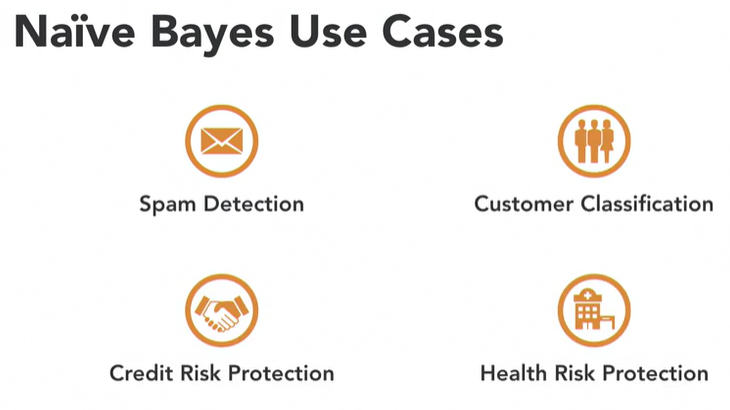


Use cases for Naïve Bayes includes: spam detection, customer classification, credit risk prediction and health risk prediction. 

the assumptions of the Naïve Bayes model, 



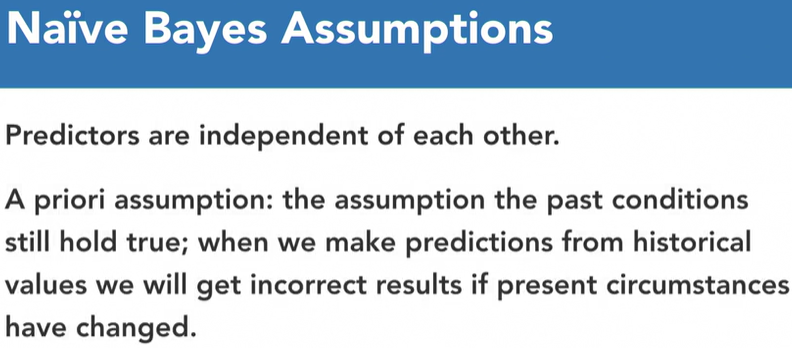

Naïve Bayes assumes that your predictors are independent of each other. It also holds an a-priori assumption. 
This assumption is that past conditions still hold true. 

Basically, when we make predictions from historical values, we will get incorrect results if present circumstances have changed. 

A little note I wanted to add here is that, actually all regression models maintain an a-priori assumption.

## Demonstration

In [2]:
import numpy as np
import pandas as pd
import urllib
import sklearn

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

## Naive Bayes
### Using Naive Bayes to predict spam

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

import urllib.request

raw_data = urllib.request.urlopen(url)

## load txt that are coma separated files
dataset = np.loadtxt(raw_data, delimiter=',')

print(dataset[0])

[  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.      1.   ]


In [8]:
### select first 48 variables
X = dataset[:,0:48]


### target variable spam and not spam
y = dataset[:,-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=17)

In [18]:
BernNB = BernoulliNB(binarize=True) ## so the model does binning
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.8577633007600435


In [19]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)


y_pred = MultiNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.8816503800217155


In [20]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)


y_pred = GausNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)
0.8197611292073833


I went ahead and played around with this a little bit earlier and I was able to find that if we set our binarize parameter equal to 0.1, we get optimal results.

In [10]:
BernNB = BernoulliNB(binarize=0.1) ## 
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)
0.9109663409337676
